<h1>Purpose of Project
<h2>: Predict suvival on the Titanic

<h1><u>Process</u>
<br>

<h3>0. Import data
<br>
<h3>1. Exploratory data analysis
    * Explore each data file structure
    *  Basic statistics visualization
<br>
<h3>2. Feature Engineering 
    * Data Cleansing
    * Select which feature should be included in model 
<br>
<h3>3. Modeling 
    * Logistic Regression
    * Support Vector Machine(SVM)
    * k-Nearest Neighbor(KNN)
    * Random Forest
    * Naive Bayes
<br>

<h3>4. Testing

<h1><b>0. Import Data</b>

In [1726]:
import pandas as pd
import numpy as np

test = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\python\\Kaggle\\titanic\\test.csv")
train = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\python\\Kaggle\\titanic\\train.csv")

<h1><b>1.Exploratory data analysis</b>
<h3><br>(1) Check Data info 

In [1727]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [1728]:
test.head(80)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
76,968,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
78,970,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.0000,NaN,S


<h3>(2) Check Missing Data

In [1729]:
train.info()
#Age / Cabin info(=Cabin number) missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1730]:
test.info()
#Age / Cabin info(=Cabin number) missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h3>(3)Visualization

In [1731]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [1732]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [1733]:
# 파이차트

#def pie_cahrt(feature):
#     feature_ratio = train[feature].value_counts(sort=False)
#     feature_size = featrue_ration.size
#     feature_index = feature_ratio.index
#     survived = train[train['Survived']==1][feature].value_counts()
#     dead = train[train['Survived']==0][feature].value_counts()

# ​    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
# ​    plt.title(feature + '\'s ratio in total')
# ​    plt.show()

# ​    for i, index in enumerate(feature_index):
# ​        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
# ​        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
# ​        plt.title(str(index) + '\'s ratio')

# ​    plt.show()


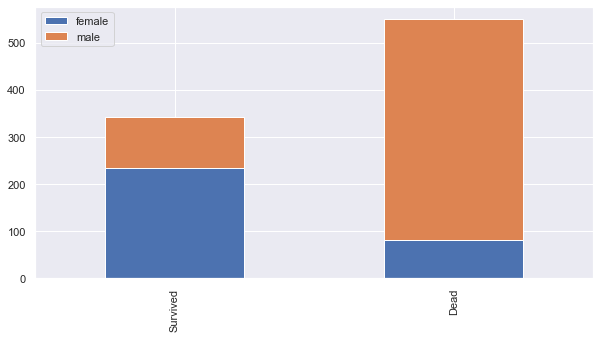

In [1734]:
bar_chart('Sex')
#Chart illustrates that female tent to survived than male

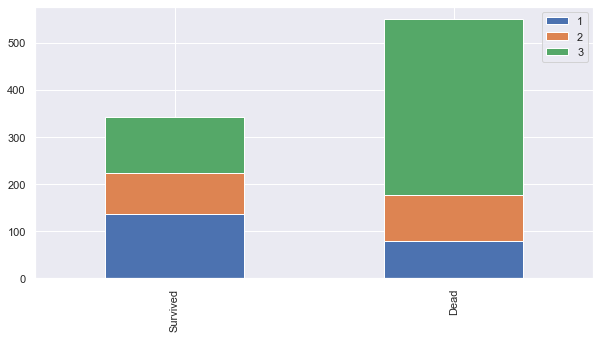

In [1735]:
bar_chart('Pclass')
#Chart shows more 1st class passengers were survived than any other classes passengers
#3rd class passengers took highest proportions from the death toll

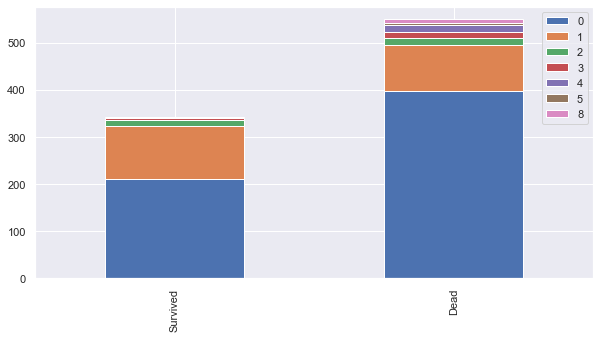

In [1736]:
bar_chart('SibSp') # # of siblings / spouses aboard the Titanic

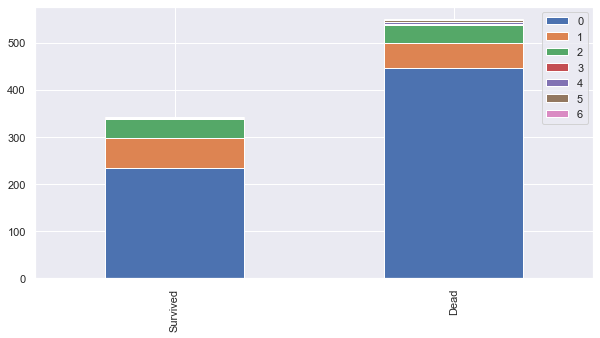

In [1737]:
bar_chart('Parch') # # of parents / children aboard the Titanic

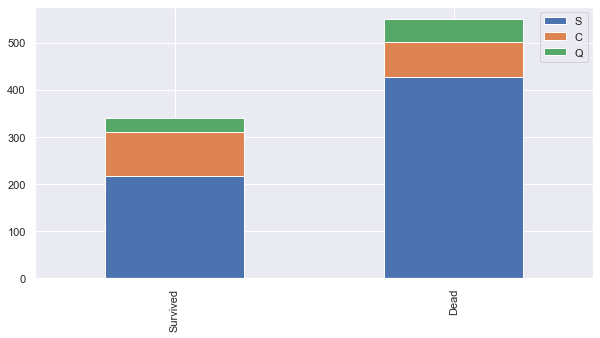

In [1738]:
bar_chart('Embarked')

2. Feature Engineering
<br>To sum up Exploratory Analysis, Female & High class passengers & passengers who were accompanying family
 showed less death toll.

 <br>
 < Data preprocessing ><br>
 - Merge train & test data
 - Data cleansing
     - Name Feature : Extract 'Title' from names - Using regular expression / Unify similar title into 3 catogories -> Create dictionary: 0-Mr / 1-Miss / 2-Mrs / 3-others
     - Sex feature: convert to string Data
     - Embaked: Handle missing data - Replace 'NaN'elements<br>
        (*Ref: How to handle missing data: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
     - Age: Binning - Categorize continuous data into few scale(=string) groups (To reduce deviation scale) / Handle missing data - Replace 'Nan' into 'Mean' value of each age group
     - Fare: Handle missing data - Replace 'Nan' into an average of each Pclass' fare / Binning - into numeric data(=int) group
     - SibSp & Parch: Merge two feature into new "Family" feature
- Drop non-using features: Name, Ticket, Cabin, SibSp, Parch

(0) Merge Train & Test Data

In [1739]:
train_test_data = [train, test] 
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

(1) Data cleansing - Name

In [1740]:
for dataset in train_test_data:
    #dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.') #정규식: 대문자 A-Z로 시작하고 .로 끝나는 모든 문자열을 추출한다

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1741]:
#Count each each titles frequency
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Sir           1
Lady          1
Capt          1
Don           1
Jonkheer      1
Countess      1
Ms            1
Name: Title, dtype: int64

In [1742]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [1743]:
pd.crosstab(test['Title'],train['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,0,1
Dr,1,0
Master,6,15
Miss,26,52
Mr,95,145
Mrs,31,41
Ms,1,0
Rev,0,2


In [1744]:
#Reshaping data using cross tabulation: Matching Title and Gender
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [1745]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1746]:
#Create dictionary: 0-Mr / 1-Miss / 2-Mrs / 3-others
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Capt': 0, 'Col': 0, 'Countess': 3, 'Don': 0, 'Dr': 3, 'Jonkheer': 0, 'Lady': 3, 'Major': 0, 'Master': 0, 'Mlle': 3, 'Mme': 3, 'Ms': 2, 'Rev': 0, 'Sir': 0, 'Dona':1, }

for dataset in train_test_data:
    print(dataset['Title'].isnull().sum())

    dataset['Title_categorical'] = dataset['Title'].map(title_mapping)

    print(dataset['Title_categorical'].isnull().sum())

0
0
0
0


In [1747]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [1748]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


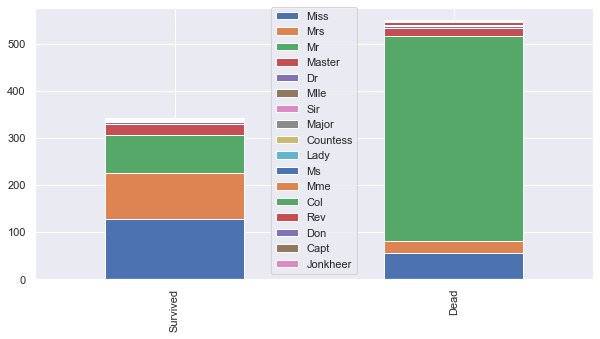

In [1749]:
bar_chart('Title')

(2) Sex - Data Mapping

In [1750]:
# sex_mapping = {'male': 0, 'female': 1}
# for dataset in train_test_data:
#     dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.loc[train['Sex'] == 'female', 'Sex'] = 1
train.loc[train['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1
test.loc[test['Sex'] == 'male', 'Sex'] = 0
train['Sex'] = train['Sex'].astype(int)
test['Sex'] = test['Sex'].astype(int)



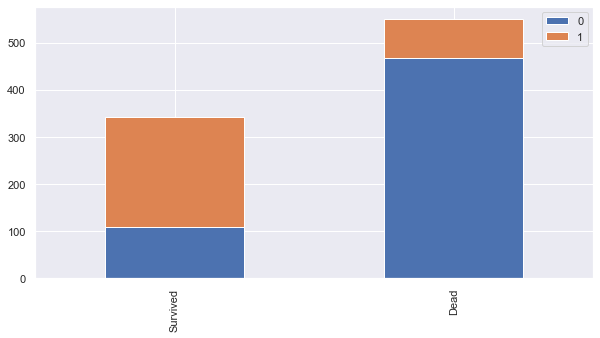

In [1751]:
bar_chart('Sex')

In [1752]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [1753]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


(3) Embaked: Handle missing data - Replace 'NaN'elements

In [1754]:
#check 'Nan Value
train.isnull().sum()
#There are 2 missing Embarked value in train data

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2
Title                  0
Title_categorical      0
dtype: int64

In [1755]:
test.isnull().sum()
#There is no missing data in test data

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                   86
SibSp                  0
Parch                  0
Ticket                 0
Fare                   1
Cabin                327
Embarked               0
Title                  0
Title_categorical      0
dtype: int64

In [1756]:
#Fill Nan value in testset with 'S'

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)    

In [1757]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    int32  
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           891 non-null    object 
 12  Title              891 non-null    object 
 13  Title_categorical  891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 94.1+ KB


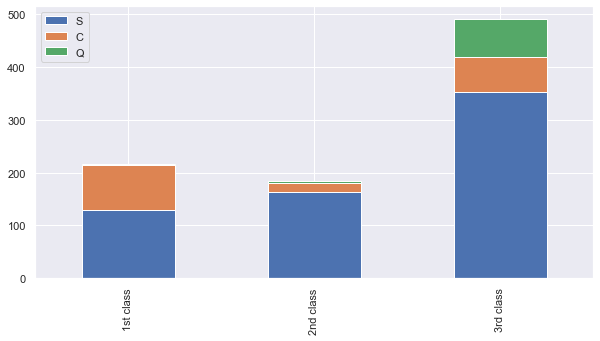

In [1758]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Most of the 3rd class passengers were on board from 'Q'
<br>It can be assumed that passengers aboard from 'Q' are more likely to die

In [1759]:
#Mapping "Class" into categorical value
embarked_mapping = {'S' : 0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

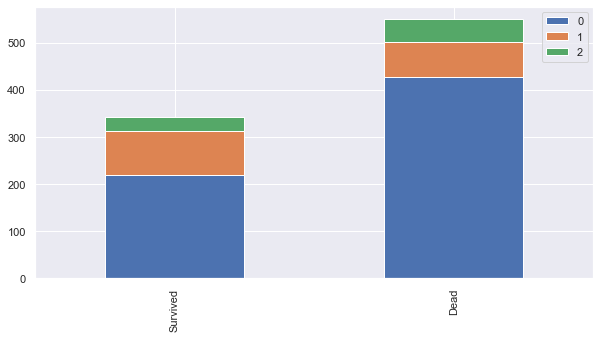

In [1760]:
bar_chart('Embarked')

(3) Age<br>
 - Check missing data <br>
 - Handle missing data - Replace 'Nan' into 'Mean' value of each age group <br>
 - Binning - Categorize continuous data into few scale(=string) groups (To reduce deviation scale)

In [1761]:
#Chech the common characteristics of Nan data
age_nan_train = train[train['Age'].isnull()]
age_nan_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2,Mr,0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0,Mr,0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1,Mrs,2
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1,Mr,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2,Miss,1


In [1762]:
age_nan_test = test[test['Age'].isnull()]
age_nan_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical
10,902,3,"Ilieff, Mr. Ylio",0,NaN,0,0,349220,7.8958,NaN,0,Mr,0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",1,NaN,0,0,PC 17598,31.6833,NaN,0,Mrs,2
29,921,3,"Samaan, Mr. Elias",0,NaN,2,0,2662,21.6792,NaN,1,Mr,0
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,Mrs,2
36,928,3,"Roth, Miss. Sarah A",1,NaN,0,0,342712,8.0500,NaN,0,Miss,1


In [1763]:
#Replace missing 'Age' data into each Title group's age median value
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

In [1764]:
#Check if 'Nan' values have been replaced properly
print(train[train['Age'].isnull()])
print(test[test['Age'].isnull()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Title_categorical]
Index: []
    PassengerId  Pclass                     Name  Sex  Age  SibSp  Parch  \
88          980       3  O'Donoghue, Ms. Bridget    1  NaN      0      0   

    Ticket  Fare Cabin  Embarked Title  Title_categorical  
88  364856  7.75   NaN         2    Ms                  2  


In [1765]:
test['Age'].fillna(28, inplace = True)

In [1766]:
print(test[test['Age'].isnull()])

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Title_categorical]
Index: []


In [1767]:
#Median Age of Each Title
#0-Mr / 1-Miss / 2-Mrs / 3-others
Median_age = train['Age'].groupby(train['Title'])
Median_age
Median_age.median()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

In [1768]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

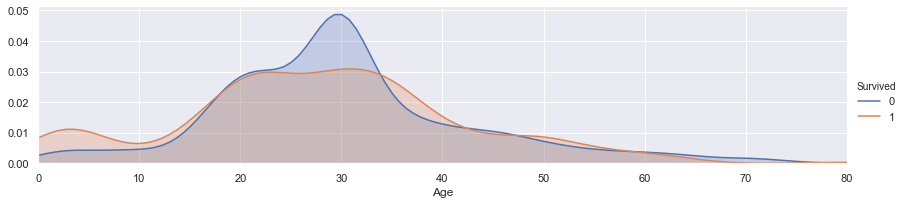

In [1769]:
#Visualize Age distribution
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [1770]:
print(np.isnan(test['Age']).any())

def binning(ttd, feature, bins):
    feature_category = feature + '_category'
    for dataset in ttd:
        for i in range(len(bins)-1):
            dataset.loc[(dataset[feature] >= bins[i]) & (dataset[feature] <= bins[i+1]), feature_category] = i
        dataset.loc[(dataset[feature] > bins[len(bins)-1]), feature_category] = len(bins)


binning(train_test_data, 'Age', [0, 16, 32, 48, 64])


# for dataset in train_test_data:
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1,
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2,
#     dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
#     dataset.loc[ dataset['Age'] > 62, 'Age'] = 4


False


In [1771]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Mrs,2,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",0,30.0,0,0,374910,8.0500,NaN,0,Mr,0,1.0
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,1,Mr,0,5.0
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,PC 17759,63.3583,D10 D12,1,Mr,0,1.0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",1,34.0,0,1,231919,23.0000,NaN,0,Mrs,2,2.0


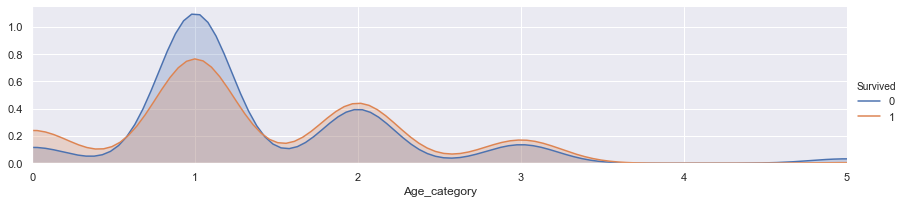

In [1772]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age_category',shade= True)
facet.set(xlim=(0, train['Age_category'].max()))
facet.add_legend()
 
plt.show()

In [1773]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Mrs,2,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr,0,2.0


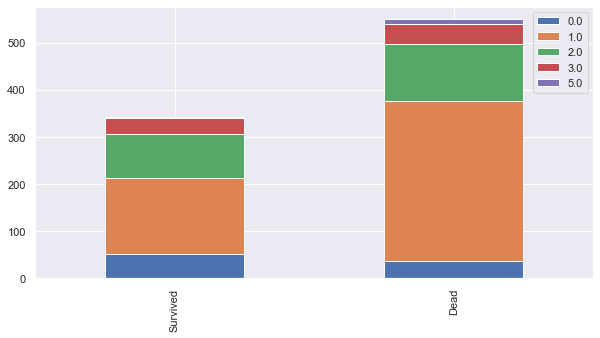

In [1774]:
bar_chart('Age_category')

(4) Fare: Handle missing data - Replace 'Nan' into an average of each Pclass' fare / Binning - into numeric data(=int) group

In [1775]:
#Replace missing 'Fare' data into each Class group's Fare median value
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

In [1776]:
#Check if 'Nan' values have been replaced properly
print(test[test['Fare'].isnull()])
print(train[train['Fare'].isnull()])


Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Title_categorical, Age_category]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Title_categorical, Age_category]
Index: []


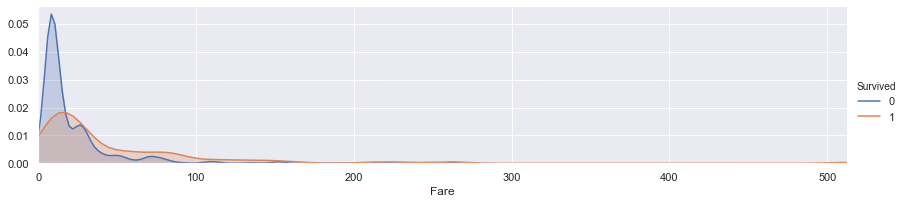

In [1777]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

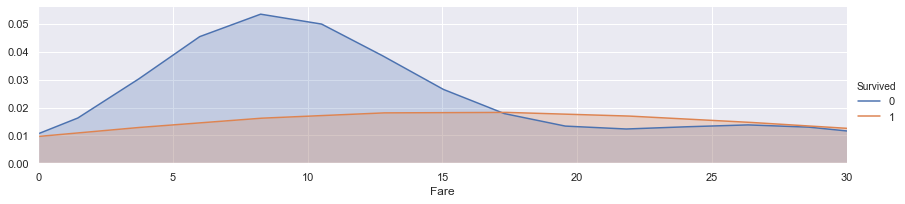

In [1778]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)
 
plt.show()

In [1779]:
#Binning Numerical Age to Categorical Variable
print(np.isnan(train_test_data[0]['Fare']).any())
print(train.loc[train['Fare'] == 0])
binning(train_test_data, 'Fare', [0, 17, 30, 100])
print(np.isnan(train_test_data[0]['Fare_category']).any())

train_test_data

False
     PassengerId  Survived  Pclass                              Name  Sex  \
179          180         0       3               Leonard, Mr. Lionel    0   
263          264         0       1             Harrison, Mr. William    0   
271          272         1       3      Tornquist, Mr. William Henry    0   
277          278         0       2       Parkes, Mr. Francis "Frank"    0   
302          303         0       3   Johnson, Mr. William Cahoone Jr    0   
413          414         0       2    Cunningham, Mr. Alfred Fleming    0   
466          467         0       2             Campbell, Mr. William    0   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"    0   
597          598         0       3               Johnson, Mr. Alfred    0   
633          634         0       1     Parr, Mr. William Henry Marsh    0   
674          675         0       2        Watson, Mr. Ennis Hastings    0   
732          733         0       2              Knight, Mr. Robert J  

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
 2                               Heikkinen, Miss. Laina    1  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
 4                             Allen, Mr. William Henry    0  35.0      0   
 ..                                                 ...  ...   ...  

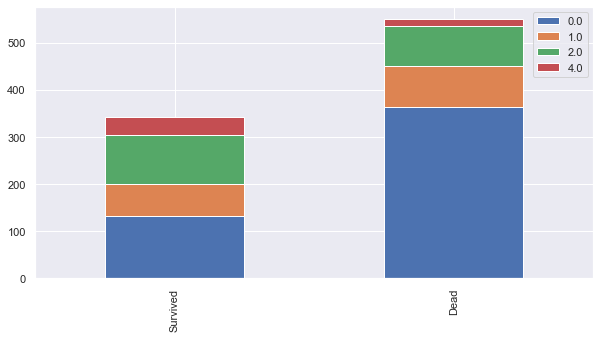

In [1780]:
bar_chart('Fare_category')

In [1781]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical,Age_category,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr,0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,2,2.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,1,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Mrs,2,2.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr,0,2.0,0.0


In [1782]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_categorical,Age_category,Fare_category
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,Mr,0,2.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,Mrs,2,2.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,Mr,0,3.0,0.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,Mr,0,1.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,Mrs,2,1.0,0.0


(5) SibSp & Parch: Merge two feature into new "Family" feature

In [1783]:
for dataset in train_test_data:
    dataset['Family'] = dataset['Parch'] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

(6) Feature Drop

In [1784]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','Fare', 'Age', 'Title']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

print(train.head())
print(test.head())

PassengerId  Survived  Pclass  Sex  Embarked  Title_categorical  \
0            1         0       3    0         0                  0   
1            2         1       1    1         1                  2   
2            3         1       3    1         0                  1   
3            4         1       1    1         0                  2   
4            5         0       3    0         0                  0   

   Age_category  Fare_category  Family  
0           1.0            0.0       1  
1           2.0            2.0       1  
2           1.0            0.0       0  
3           2.0            2.0       1  
4           2.0            0.0       0  
   PassengerId  Pclass  Sex  Embarked  Title_categorical  Age_category  \
0          892       3    0         2                  0           2.0   
1          893       3    1         0                  2           2.0   
2          894       2    0         2                  0           3.0   
3          895       3    0         0   

In [1785]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [1786]:
train_data.shape

(891, 8)

In [1787]:
test_data = test

In [1788]:
train_data.head()

,PassengerId,Pclass,Sex,Embarked,Title_categorical,Age_category,Fare_category,Family
0,1,3,0,0,0,1.0,0.0,1
1,2,1,1,1,2,2.0,2.0,1
2,3,3,1,0,1,1.0,0.0,0
3,4,1,1,0,2,2.0,2.0,1
4,5,3,0,0,0,2.0,0.0,0


In [1789]:
test_data.head()

,PassengerId,Pclass,Sex,Embarked,Title_categorical,Age_category,Fare_category,Family
0,892,3,0,2,0,2.0,0.0,0
1,893,3,1,0,2,2.0,0.0,1
2,894,2,0,2,0,3.0,0.0,0
3,895,3,0,0,0,1.0,0.0,0
4,896,3,1,0,2,1.0,0.0,2


3. Modeling<br> 
    * k-Nearest Neighbor(KNN)<br>
    * DecisionTree<br>
    * Random Forest<br>
    * Naive Bayes<br>
    * Support Vector Machine(SVM)<br>

In [1790]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

(0) Cross Validation (K-Fold)<br>
Bias를 최소화 하도록 Data set을 Train/validation set을 여러번 쪼개서 Accuracy를 측정 후 Final Accuracy가 가장 높은것을 test data set으로 쓴다?


In [1791]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) #10개의 split을 사용하여 Validation 과정을 수행

(1)kNN

In [1792]:
clf = KNeighborsClassifier(n_neighbors = 13) #13개의 이웃을 기준으로 측정 
clf.fit(train_data, target)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score) #교차 검증 스코어 

[0.51111111 0.62921348 0.53932584 0.58426966 0.60674157 0.56179775
 0.48314607 0.56179775 0.56179775 0.50561798]


In [1793]:
#kNN Score
round(np.mean(score)*100, 2)

55.45

(2) Decision Tree

In [1794]:
clf = DecisionTreeClassifier()

In [1795]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1796]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score) #아까와 동일 

[0.77777778 0.80898876 0.70786517 0.76404494 0.70786517 0.80898876
 0.75280899 0.7752809  0.70786517 0.76404494]


In [1797]:
#Decision Tree Score
round(np.mean(score)*100, 2)

75.76

(3) Random Forest

In [1798]:
clf = RandomForestClassifier(n_estimators=13) #13개의 decision tree사용
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1799]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.75280899 0.75280899 0.7752809  0.73033708 0.83146067
 0.78651685 0.74157303 0.73033708 0.78651685]


In [1800]:
#Random Forest Score
round(np.mean(score)*100, 2)

76.99

(4) Naive Bayes

In [1801]:
clf = GaussianNB()
clf

GaussianNB(priors=None, var_smoothing=1e-09)

In [1802]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.79775281 0.76404494 0.76404494 0.74157303 0.78651685
 0.78651685 0.84269663 0.80898876 0.79775281]


In [1803]:
#Naive Bayes Score
round(np.mean(score)*100, 2)

78.9

(5) Suppor Vector Machine

In [1804]:
clf = SVC()
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1805]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.56666667 0.66292135 0.65168539 0.59550562 0.69662921 0.65168539
 0.59550562 0.65168539 0.56179775 0.52808989]


In [1806]:
round(np.mean(score)*100,2)

61.62

4. Testing

In [1815]:
clf = GaussianNB()
clf.fit(train_data, target) #학습시킬 데이터, 예측해야하는 타겟칼럼

GaussianNB(priors=None, var_smoothing=1e-09)

In [1816]:
test_data['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int32

In [1817]:
for (columnName, columnData) in test_data.iteritems():
    print(columnName)
    print(str(np.isnan(columnData).any()))


PassengerId
False
Pclass
False
Sex
False
Embarked
False
Title_categorical
False
Age_category
False
Fare_category
False
Family
False


In [1818]:
prediction = clf.predict(test_data) 

#drop passengerid col

In [1819]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1820]:
import collections, numpy

collections.Counter(prediction)

Counter({0: 257, 1: 161})

In [1821]:
submission = pd.DataFrame({
        'PassengerId' : test['PassengerId'],
        'Survived':prediction
    })
submission.to_csv('submission.csv', index=False)